- a) Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib


- b) Import danych

In [2]:
df = pd.read_csv('pacjenci_demo_system_ekspertowy.csv')

- c) Analiza danych wej?ciowych

In [3]:
df[['age','bmi','glucose','systolic_bp','diastolic_bp']].describe()

,age,bmi,glucose,systolic_bp,diastolic_bp
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,56.800000,26.426667,123.933333,142.000000,87.033333
std,19.155264,3.708140,29.270361,28.988702,17.947209
min,24.000000,21.200000,70.000000,97.000000,56.000000
25%,46.750000,23.525000,97.750000,121.000000,75.250000
50%,56.000000,26.200000,128.000000,147.500000,87.000000
75%,72.750000,28.700000,146.500000,169.250000,100.750000
max,88.000000,36.700000,168.000000,189.000000,119.000000


- d) Wizualizacja danych

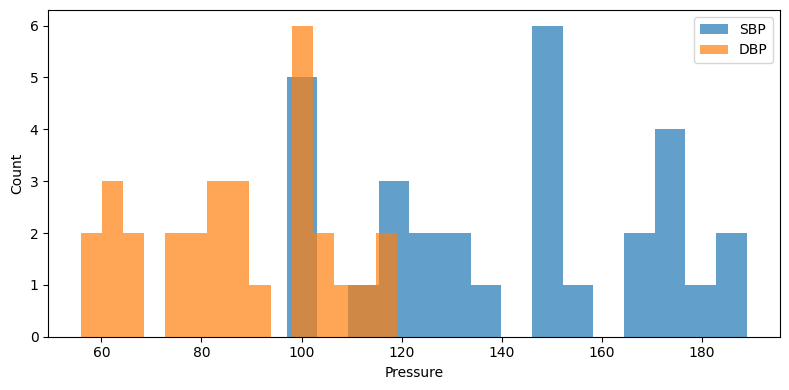

In [4]:
plt.figure(figsize=(8,4))
plt.hist(df['systolic_bp'], bins=15, alpha=0.7, label='SBP')
plt.hist(df['diastolic_bp'], bins=15, alpha=0.7, label='DBP')
plt.xlabel('Pressure')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


- e) Przygotowanie etykiety ryzyka

In [5]:
df['risk'] = ((df['systolic_bp'] >= 140) | (df['diastolic_bp'] >= 90)).astype(int)

- f) Przygotowanie danych do ML

In [6]:
X = df[['age','bmi','glucose','systolic_bp','diastolic_bp']]
y = df['risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


- g) Trenowanie modelu ML

In [7]:
model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])
model.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000))])

- h) Ocena modelu

In [8]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


1.0

- i) Zapis modelu

In [9]:
joblib.dump(model, 'risk_model.joblib')

['risk_model.joblib']